In [143]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from matplotlib.ticker import ScalarFormatter

In [91]:
label_map = {
    'aposteriori': 'a-posteriori',
    'apriori': 'a-priori',
    'none': 'none',
    'apriori (unbiased)': 'a-priori',
}

## Theorem 1

In [92]:
f1 = '/home/dhasade/audits/ml-audits/results/plots_data/ft_stratified_budget_vs_cum_error.csv'
g1 = '/home/dhasade/audits/ml-audits/results/plots_data/gc_stratified_budget_vs_cum_error.csv'
h1 = '/home/dhasade/audits/ml-audits/results/plots_data/pp_stratified_budget_vs_cum_error.csv'

In [93]:
df1 = pd.read_csv(f1)
dg1 = pd.read_csv(g1)
dh1 = pd.read_csv(h1)

In [107]:
s = 7
params = {
   'legend.fontsize': s,
   'legend.title_fontsize': s,
   'xtick.labelsize': 6,
   'ytick.labelsize': 6,
   'axes.labelsize': s+1,
   'text.usetex': False,
#    'figure.figsize': [2.3, 1.3],
   'figure.figsize': [3.5, 1.2],
   'lines.linewidth': 1,
   'lines.markersize': 3,
   'axes.titlesize': s+1,
   }

# set rc params
plt.rcParams.update(params)
# no background for the legend
plt.rc('legend', frameon=False)    # no background for the legend

In [108]:
collabs = df1['collaboration'].unique()
markers = ['o', 's', '^', 'v', 'D', 'P', 'v', '<', '>']

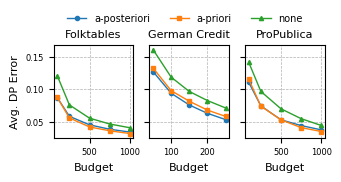

In [112]:
# create 1 x 3 subplots
fig, axs = plt.subplots(1, 3, sharey=True)

# plot budget vs dp_error for each collaboration for df1
for i, collaboration in enumerate(collabs):
    df_temp = df1[df1['collaboration'] == collaboration]
    axs[0].plot(df_temp['budget'], df_temp['dp_error'], label=label_map[collaboration], marker=markers[i])
    axs[0].grid(True, which='both', linestyle='--', linewidth=0.5)    

    df_temp = dg1[dg1['collaboration'] == collaboration]
    axs[1].plot(df_temp['budget'], df_temp['dp_error'], label=label_map[collaboration], marker=markers[i])
    axs[1].grid(True, which='both', linestyle='--', linewidth=0.5)

    df_temp = dh1[dh1['collaboration'] == collaboration]
    axs[2].plot(df_temp['budget'], df_temp['dp_error'], label=label_map[collaboration], marker=markers[i])
    axs[2].grid(True, which='both', linestyle='--', linewidth=0.5)

axs[0].set_title('Folktables')
axs[1].set_title('German Credit')
axs[2].set_title('ProPublica')

axs[0].set_ylabel('Avg. DP Error')

axs[0].set_xlabel('Budget')
axs[1].set_xlabel('Budget')
axs[2].set_xlabel('Budget')

# one legend for all subplots
handles, labels = axs[0].get_legend_handles_labels()
# ph = [plt.plot([],marker="", ls="")[0]] # Canvas
# handles = ph + handles
# labels = ['Collaboration'] + labels
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1.22), ncol=3)

# plot_name = 'stratified_budget_vs_error_all_datasets.pdf'
# plt.savefig(f'/home/dhasade/audits/ml-audits/results/ECAI/plots/{plot_name}', bbox_inches='tight', dpi=300)

## Theorem 2

In [219]:
f1 = '/home/dhasade/audits/ml-audits/results/plots_data/ft_multicolab_stratified.csv'
f2 = '/home/dhasade/audits/ml-audits/results/plots_data/ft_multicolab_uniform.csv'
f3 = '/home/dhasade/audits/ml-audits/results/plots_data/ft_multicolab_neyman.csv'

g1 = '/home/dhasade/audits/ml-audits/results/plots_data/gc_multicolab_stratified.csv'
g2 = '/home/dhasade/audits/ml-audits/results/plots_data/gc_multicolab_uniform.csv'
g3 = '/home/dhasade/audits/ml-audits/results/plots_data/gc_multicolab_neyman.csv'

h1 = '/home/dhasade/audits/ml-audits/results/plots_data/pp_multicolab_stratified.csv'
h2 = '/home/dhasade/audits/ml-audits/results/plots_data/pp_multicolab_uniform.csv'
h3 = '/home/dhasade/audits/ml-audits/results/plots_data/pp_multicolab_neyman.csv'

In [220]:
df1 = pd.read_csv(f1); df2 = pd.read_csv(f2); df3 = pd.read_csv(f3)
dg1 = pd.read_csv(g1); dg2 = pd.read_csv(g2); dg3 = pd.read_csv(g3)
dh1 = pd.read_csv(h1); dh2 = pd.read_csv(h2); dh3 = pd.read_csv(h3)

# keep only aposteriori collaboration
df1 = df1[df1['collaboration'] == 'aposteriori']; df2 = df2[df2['collaboration'] == 'aposteriori']; df3 = df3[df3['collaboration'] == 'aposteriori']
dg1 = dg1[dg1['collaboration'] == 'aposteriori']; dg2 = dg2[dg2['collaboration'] == 'aposteriori']; dg3 = dg3[dg3['collaboration'] == 'aposteriori']
dh1 = dh1[dh1['collaboration'] == 'aposteriori']; dh2 = dh2[dh2['collaboration'] == 'aposteriori']; dh3 = dh3[dh3['collaboration'] == 'aposteriori']

# add a column to indicate the sampling strategy
df1['sample'] = 'stratified'; df2['sample'] = 'uniform'; df3['sample'] = 'neyman'
dg1['sample'] = 'stratified'; dg2['sample'] = 'uniform'; dg3['sample'] = 'neyman'
dh1['sample'] = 'stratified'; dh2['sample'] = 'uniform'; dh3['sample'] = 'neyman'

# concatenate the two dataframes
df = pd.concat([df1, df2, df3])
dg = pd.concat([dg1, dg2, dg3])
dh = pd.concat([dh1, dh2, dh3])

In [230]:
# get the different between stratified and neyman sampling
df1['cum_dp_error'] - df3['cum_dp_error']

2     0.000698
5     0.000466
8     0.000691
11    0.000896
14    0.000537
Name: cum_dp_error, dtype: float64

In [231]:
dg1['cum_dp_error'] - dg3['cum_dp_error']

2     0.001351
5     0.000442
8    -0.000353
11    0.000400
14   -0.000337
Name: cum_dp_error, dtype: float64

In [232]:
dh1['cum_dp_error'] - dh3['cum_dp_error']

2     0.000205
5    -0.000450
8    -0.000325
11    0.000151
14   -0.000239
Name: cum_dp_error, dtype: float64

In [221]:
s = 7
params = {
   'legend.fontsize': s,
   'legend.title_fontsize': s,
   'xtick.labelsize': 6,
   'ytick.labelsize': 6,
   'axes.labelsize': s+1,
   'text.usetex': False,
#    'figure.figsize': [2.3, 1.3],
   'figure.figsize': [3.5, 1.2],
   'lines.linewidth': 1,
   'lines.markersize': 3,
   'axes.titlesize': s+1,
   }

# set rc params
plt.rcParams.update(params)
# no background for the legend
plt.rc('legend', frameon=False)    # no background for the legend

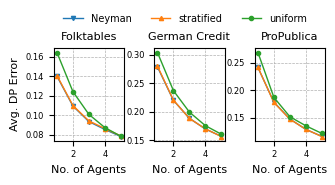

In [211]:
# create 1 x 3 subplots
fig, axs = plt.subplots(1, 3, sharey=False)

sampling_strategies = ['neyman', 'stratified', 'uniform']
markers = ['v', '^', 'o', 'v', 'D', 'P', 'v', '<', '>']
linestyles = ['-', '-', '-']

# plot budget vs dp_error for each collaboration for df1
for i, sampling_strategy in enumerate(sampling_strategies):
    # capitalize the first letter
    if sampling_strategy == 'neyman': 
        sampling_strategy_label = sampling_strategy.capitalize()
    else:
        sampling_strategy_label = sampling_strategy
    df_temp = df[df['sample'] == sampling_strategy]
    axs[0].plot(df_temp['n'], df_temp['cum_dp_error'], label=sampling_strategy_label, marker=markers[i], linestyle=linestyles[i])
    axs[0].grid(True, which='both', linestyle='--', linewidth=0.5)    

    df_temp = dg[dg['sample'] == sampling_strategy]
    axs[1].plot(df_temp['n'], df_temp['cum_dp_error'], label=sampling_strategy_label, marker=markers[i], linestyle=linestyles[i])
    axs[1].grid(True, which='both', linestyle='--', linewidth=0.5)

    df_temp = dh[dh['sample'] == sampling_strategy]
    axs[2].plot(df_temp['n'], df_temp['cum_dp_error'], label=sampling_strategy_label, marker=markers[i], linestyle=linestyles[i])
    axs[2].grid(True, which='both', linestyle='--', linewidth=0.5)

axs[0].set_title('Folktables')
axs[1].set_title('German Credit')
axs[2].set_title('ProPublica')

axs[0].set_ylabel('Avg. DP Error')

axs[0].set_xlabel('No. of Agents')
axs[1].set_xlabel('No. of Agents')
axs[2].set_xlabel('No. of Agents')

# set xticks
xticks = [2, 4]
axs[0].set_xticks(xticks)
axs[1].set_xticks(xticks)
axs[2].set_xticks(xticks)

# formatter = ScalarFormatter(useMathText=True)
# formatter.set_scientific(True)
# formatter.set_powerlimits((0, 2))
# axs[0].yaxis.set_major_formatter(formatter)
# axs[1].yaxis.set_major_formatter(formatter)
# axs[2].yaxis.set_major_formatter(formatter)
# one legend for all subplots
handles, labels = axs[0].get_legend_handles_labels()
# ph = [plt.plot([],marker="", ls="")[0]] # Canvas
# handles = ph + handles
# labels = ['Sampling:'] + labels
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1.24), ncol=3)
# fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1.34), ncol=3)
# plt.tight_layout()
plt.subplots_adjust(wspace=0.43)

# plot_name = 'multicolab_all_all_datasets.pdf'
# plt.savefig(f'/home/dhasade/audits/ml-audits/results/ECAI/plots/{plot_name}', bbox_inches='tight', dpi=300)

## Theorem 3

In [131]:
f1 = '/home/dhasade/audits/ml-audits/results/plots_data/ft_multicolab_stratified.csv'
g1 = '/home/dhasade/audits/ml-audits/results/plots_data/gc_multicolab_stratified.csv'
h1 = '/home/dhasade/audits/ml-audits/results/plots_data/pp_multicolab_stratified.csv'

In [132]:
df1 = pd.read_csv(f1)
dg1 = pd.read_csv(g1)
dh1 = pd.read_csv(h1)

# remove collaboration == none
df1 = df1[~(df1['collaboration'] == 'none')]
dg1 = dg1[~(dg1['collaboration'] == 'none')]
dh1 = dh1[~(dh1['collaboration'] == 'none')]

In [133]:
s = 7
params = {
   'legend.fontsize': s,
   'legend.title_fontsize': s,
   'xtick.labelsize': 6,
   'ytick.labelsize': 6,
   'axes.labelsize': s+1,
   'text.usetex': False,
#    'figure.figsize': [2.3, 1.3],
   'figure.figsize': [3.7, 1.3],
   'lines.linewidth': 1,
   'lines.markersize': 3,
   'axes.titlesize': s+1,
   }

# set rc params
plt.rcParams.update(params)
# no background for the legend
plt.rc('legend', frameon=False)    # no background for the legend

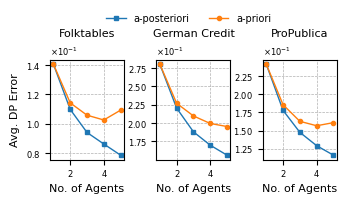

In [152]:
# create 1 x 3 subplots

fig, axs = plt.subplots(1, 3, sharey=False)

collabs = ['aposteriori', 'apriori']

# plot budget vs dp_error for each collaboration for df1
for i, collaboration in enumerate(collabs):
    df_temp = df1[df1['collaboration'] == collaboration]
    axs[0].plot(df_temp['n'], df_temp['cum_dp_error'], label=label_map[collaboration], marker=markers[i])
    axs[0].grid(True, which='both', linestyle='--', linewidth=0.5)    

    df_temp = dg1[dg1['collaboration'] == collaboration]
    axs[1].plot(df_temp['n'], df_temp['cum_dp_error'], label=label_map[collaboration], marker=markers[i])
    axs[1].grid(True, which='both', linestyle='--', linewidth=0.5)

    df_temp = dh1[dh1['collaboration'] == collaboration]
    axs[2].plot(df_temp['n'], df_temp['cum_dp_error'], label=label_map[collaboration], marker=markers[i])
    axs[2].grid(True, which='both', linestyle='--', linewidth=0.5)

axs[0].set_title('Folktables')
axs[1].set_title('German Credit')
axs[2].set_title('ProPublica')

axs[0].set_ylabel('Avg. DP Error')

axs[0].set_xlabel('No. of Agents')
axs[1].set_xlabel('No. of Agents')
axs[2].set_xlabel('No. of Agents')

# set xticks
xticks = [2, 4]
axs[0].set_xticks(xticks)
axs[1].set_xticks(xticks)
axs[2].set_xticks(xticks)

formatter = ScalarFormatter(useMathText=True)
formatter.set_scientific(True)
formatter.set_powerlimits((0, 2))
axs[0].yaxis.set_major_formatter(formatter)
axs[1].yaxis.set_major_formatter(formatter)
axs[2].yaxis.set_major_formatter(formatter)
# one legend for all subplots
handles, labels = axs[0].get_legend_handles_labels()
# ph = [plt.plot([],marker="", ls="")[0]] # Canvas
# handles = ph + handles
# labels = ['Collaboration'] + labels
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1.3), ncol=3)

plt.subplots_adjust(wspace=0.44)

# plot_name = 'multicolab_apr_vs_apo_all_datasets.pdf'
# plt.savefig(f'/home/dhasade/audits/ml-audits/results/ECAI/plots/{plot_name}', bbox_inches='tight', dpi=300)

## Theorem 3 for Neyman

In [212]:
f1 = '/home/dhasade/audits/ml-audits/results/plots_data/ft_multicolab_neyman.csv'
g1 = '/home/dhasade/audits/ml-audits/results/plots_data/gc_multicolab_neyman.csv'
h1 = '/home/dhasade/audits/ml-audits/results/plots_data/pp_multicolab_neyman.csv'

In [213]:
df1 = pd.read_csv(f1)
dg1 = pd.read_csv(g1)
dh1 = pd.read_csv(h1)

# remove collaboration == none
df1 = df1[~(df1['collaboration'] == 'none')]
dg1 = dg1[~(dg1['collaboration'] == 'none')]
dh1 = dh1[~(dh1['collaboration'] == 'none')]

In [214]:
s = 7
params = {
   'legend.fontsize': s,
   'legend.title_fontsize': s,
   'xtick.labelsize': 6,
   'ytick.labelsize': 6,
   'axes.labelsize': s+1,
   'text.usetex': False,
#    'figure.figsize': [2.3, 1.3],
   'figure.figsize': [3.7, 1.3],
   'lines.linewidth': 1,
   'lines.markersize': 3,
   'axes.titlesize': s+1,
   }

# set rc params
plt.rcParams.update(params)
# no background for the legend
plt.rc('legend', frameon=False)    # no background for the legend

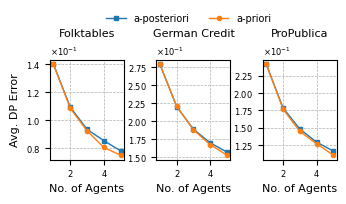

In [218]:
# create 1 x 3 subplots

fig, axs = plt.subplots(1, 3, sharey=False)

collabs = ['aposteriori', 'apriori']
markers = ['s', 'o']

# plot budget vs dp_error for each collaboration for df1
for i, collaboration in enumerate(collabs):
    df_temp = df1[df1['collaboration'] == collaboration]
    axs[0].plot(df_temp['n'], df_temp['cum_dp_error'], label=label_map[collaboration], marker=markers[i])
    axs[0].grid(True, which='both', linestyle='--', linewidth=0.5)    

    df_temp = dg1[dg1['collaboration'] == collaboration]
    axs[1].plot(df_temp['n'], df_temp['cum_dp_error'], label=label_map[collaboration], marker=markers[i])
    axs[1].grid(True, which='both', linestyle='--', linewidth=0.5)

    df_temp = dh1[dh1['collaboration'] == collaboration]
    axs[2].plot(df_temp['n'], df_temp['cum_dp_error'], label=label_map[collaboration], marker=markers[i])
    axs[2].grid(True, which='both', linestyle='--', linewidth=0.5)

axs[0].set_title('Folktables')
axs[1].set_title('German Credit')
axs[2].set_title('ProPublica')

axs[0].set_ylabel('Avg. DP Error')

axs[0].set_xlabel('No. of Agents')
axs[1].set_xlabel('No. of Agents')
axs[2].set_xlabel('No. of Agents')

# set xticks
xticks = [2, 4]
axs[0].set_xticks(xticks)
axs[1].set_xticks(xticks)
axs[2].set_xticks(xticks)

formatter = ScalarFormatter(useMathText=True)
formatter.set_scientific(True)
formatter.set_powerlimits((0, 2))
axs[0].yaxis.set_major_formatter(formatter)
axs[1].yaxis.set_major_formatter(formatter)
axs[2].yaxis.set_major_formatter(formatter)
# one legend for all subplots
handles, labels = axs[0].get_legend_handles_labels()
# ph = [plt.plot([],marker="", ls="")[0]] # Canvas
# handles = ph + handles
# labels = ['Collaboration'] + labels
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1.3), ncol=3)

plt.subplots_adjust(wspace=0.44)

# plot_name = 'multicolab_apr_vs_apo_all_datasets_neyman.pdf'
# plt.savefig(f'/home/dhasade/audits/ml-audits/results/ECAI/plots/{plot_name}', bbox_inches='tight', dpi=300)